<a href="https://colab.research.google.com/github/DeekshithaMariyappan/Netflix-EDA-/blob/main/Netflix_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from numpy import array
from numpy import argmax
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from matplotlib import cm
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
from PIL import Image

In [2]:
df=pd.read_excel('/content/Netflix Dataset.xlsx')

In [3]:
df

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,Actors,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,"Lina Leandersson, Kåre Hedebrant, Per Ragnar, ...",R,7.9,98.0,82.0,74.0,57.0,2122065.0,2008-12-12,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,https://www.youtube.com/watch?v=LqB6XJix-dM,YouTube
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,"Cleo, Paddy Considine, Beanie Feldstein, Dónal...",R,5.8,79.0,69.0,1.0,NaN,70632.0,2020-05-08,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube
2,The Con-Heartist,"Comedy, Romance","Romantic Comedies,Comedies,Romantic Films,Thai...",Thai,Movie,8.6,Thailand,> 2 hrs,Mez Tharatorn,"Pattaranad Bhiboonsawade, Mez Tharatorn, Thods...","Kathaleeya McIntosh, Nadech Kugimiya, Pimchano...",NaN,7.4,NaN,NaN,NaN,NaN,NaN,2020-12-03,2021-03-03,NaN,https://www.netflix.com/watch/81306155,https://www.imdb.com/title/tt13393728,After her ex-boyfriend cons her out of a large...,131.0,https://occ-0-2188-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BODAzOG...,https://www.youtube.com/watch?v=md3CmFLGK6Y,YouTube
3,Gleboka woda,Drama,"TV Dramas,Polish TV Shows,Social Issue TV Dramas",Polish,Series,8.7,Poland,< 30 minutes,NaN,NaN,"Katarzyna Maciag, Piotr Nowak, Marcin Dorocins...",NaN,7.5,NaN,NaN,2.0,4.0,NaN,2011-06-14,2021-03-03,NaN,https://www.netflix.com/watch/81307527,https://www.imdb.com/title/tt2300049,A group of social welfare workers led by their...,47.0,https://occ-0-2508-2706.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BMTc0Nz...,https://www.youtube.com/watch?v=5kyF2vy63r0,YouTube
4,Only a Mother,Drama,"Social Issue Dramas,Dramas,Movies Based on Boo...",Swedish,Movie,8.3,"Lithuania,Poland,France,Italy,Spain,Greece,Bel...",1-2 hour,Alf Sjöberg,Ivar Lo-Johansson,"Hugo Björne, Eva Dahlbeck, Ulf Palme, Ragnar F...",NaN,6.7,NaN,NaN,2.0,1.0,NaN,1949-10-31,2021-03-03,NaN,https://www.netflix.com/watch/81382068,https://www.imdb.com/title/tt0041155,An unhappily married farm worker struggling to...,88.0,https://occ-0-2851-41.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BMjVmMz...,https://www.youtube.com/watch?v=H0itWKFwMpQ,YouTube
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9420,13 Going on 30,"Comedy, Fantasy, Romance","Romantic Comedies,Comedies,Romantic Films,Roma...","English, Portuguese",Movie,3.1,"Hungary,Lithuania,Romania,United Kingdom,Belgi...",1-2 hour,Gary Winick,"Josh Goldsmith, Cathy Yuspa","Andy Serkis, Jennifer Garner, Mark Ruffalo, Ju...",PG-13,6.2,65.0,57.0,NaN,11.0,57231747.0,2004-04-23,2015-04-14,"Revolution Studios, Thirteen Productions LLC",https://www.netflix.com/watch/60034573,https://www.imdb.com/title/tt0337563,When a geeky teens birthday party goes awry an...,167842.0,https://occ-0-2851-38.1.nflxso.net/dnm/api/v6/...,https://images-na.ssl-images-amazon.com/images...,https://www.youtube.com/watch?v=SApIKVq1

In [4]:
df.shape

(9425, 29)

In [5]:
df.columns

Index(['Title', 'Genre', 'Tags', 'Languages', 'Series or Movie',
       'Hidden Gem Score', 'Country Availability', 'Runtime', 'Director',
       'Writer', 'Actors', 'View Rating', 'IMDb Score',
       'Rotten Tomatoes Score', 'Metacritic Score', 'Awards Received',
       'Awards Nominated For', 'Boxoffice', 'Release Date',
       'Netflix Release Date', 'Production House', 'Netflix Link', 'IMDb Link',
       'Summary', 'IMDb Votes', 'Image', 'Poster', 'TMDb Trailer',
       'Trailer Site'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9425 entries, 0 to 9424
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Title                  9425 non-null   object        
 1   Genre                  9400 non-null   object        
 2   Tags                   9389 non-null   object        
 3   Languages              9255 non-null   object        
 4   Series or Movie        9425 non-null   object        
 5   Hidden Gem Score       9415 non-null   float64       
 6   Country Availability   9414 non-null   object        
 7   Runtime                9424 non-null   object        
 8   Director               7120 non-null   object        
 9   Writer                 7615 non-null   object        
 10  Actors                 9314 non-null   object        
 11  View Rating            6827 non-null   object        
 12  IMDb Score             9417 non-null   float64       
 13  Rot

In [8]:
df.head()

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,Actors,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,"Lina Leandersson, Kåre Hedebrant, Per Ragnar, ...",R,7.9,98.0,82.0,74.0,57.0,2122065.0,2008-12-12,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,https://www.youtube.com/watch?v=LqB6XJix-dM,YouTube
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,"Cleo, Paddy Considine, Beanie Feldstein, Dónal...",R,5.8,79.0,69.0,1.0,NaN,70632.0,2020-05-08,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube
2,The Con-Heartist,"Comedy, Romance","Romantic Comedies,Comedies,Romantic Films,Thai...",Thai,Movie,8.6,Thailand,> 2 hrs,Mez Tharatorn,"Pattaranad Bhiboonsawade, Mez Tharatorn, Thods...","Kathaleeya McIntosh, Nadech Kugimiya, Pimchano...",NaN,7.4,NaN,NaN,NaN,NaN,NaN,2020-12-03,2021-03-03,NaN,https://www.netflix.com/watch/81306155,https://www.imdb.com/title/tt13393728,After her ex-boyfriend cons her out of a large...,131.0,https://occ-0-2188-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BODAzOG...,https://www.youtube.com/watch?v=md3CmFLGK6Y,YouTube
3,Gleboka woda,Drama,"TV Dramas,Polish TV Shows,Social Issue TV Dramas",Polish,Series,8.7,Poland,< 30 minutes,NaN,NaN,"Katarzyna Maciag, Piotr Nowak, Marcin Dorocins...",NaN,7.5,NaN,NaN,2.0,4.0,NaN,2011-06-14,2021-03-03,NaN,https://www.netflix.com/watch/81307527,https://www.imdb.com/title/tt2300049,A group of social welfare workers led by their...,47.0,https://occ-0-2508-2706.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BMTc0Nz...,https://www.youtube.com/watch?v=5kyF2vy63r0,YouTube
4,Only a Mother,Drama,"Social Issue Dramas,Dramas,Movies Based on Boo...",Swedish,Movie,8.3,"Lithuania,Poland,France,Italy,Spain,Greece,Bel...",1-2 hour,Alf Sjöberg,Ivar Lo-Johansson,"Hugo Björne, Eva Dahlbeck, Ulf Palme, Ragnar F...",NaN,6.7,NaN,NaN,2.0,1.0,NaN,1949-10-31,2021-03-03,NaN,https://www.netflix.com/watch/81382068,https://www.imdb.com/title/tt0041155,An unhappily married farm worker struggling to...,88.0,https://occ-0-2851-41.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BMjVmMz...,https://www.youtube.com/watch?v=H0itWKFwMpQ,YouTube


In [9]:
df.tail()

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,Actors,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
9420,13 Going on 30,"Comedy, Fantasy, Romance","Romantic Comedies,Comedies,Romantic Films,Roma...","English, Portuguese",Movie,3.1,"Hungary,Lithuania,Romania,United Kingdom,Belgi...",1-2 hour,Gary Winick,"Josh Goldsmith, Cathy Yuspa","Andy Serkis, Jennifer Garner, Mark Ruffalo, Ju...",PG-13,6.2,65.0,57.0,NaN,11.0,57231747.0,2004-04-23,2015-04-14,"Revolution Studios, Thirteen Productions LLC",https://www.netflix.com/watch/60034573,https://www.imdb.com/title/tt0337563,When a geeky teens birthday party goes awry an...,167842.0,https://occ-0-2851-38.1.nflxso.net/dnm/api/v6/...,https://images-na.ssl-images-amazon.com/images...,https://www.youtube.com/watch?v=SApIKVq1iJQ,YouTube
9421,LIFE 2.0,Documentary,"Social & Cultural Documentaries,Biographical D...",English,Movie,8.2,"Hungary,Lithuania,India,Australia,United Kingd...",1-2 hour,Jason Spingarn-Koff,NaN,Teasa Copprue,Not Rated,6.2,89.0,65.0,1.0,NaN,NaN,2010-01-22,2015-04-14,NaN,https://www.netflix.com/watch/70129457,https://www.imdb.com/title/tt1518809,Computer users across the globe log onto the v...,878.0,https://occ-0-2851-38.1.nflxso.net/dnm/api/v6/...,https://images-na.ssl-images-amazon.com/images...,https://www.youtube.com/watch?v=2TY-O5Dc8oA,YouTube
9422,Brand New Day,"Documentary, Music","Australian Comedies,Romantic Comedies,Australi...",English,Movie,8.6,Australia,1-2 hour,Amos Gitai,NaN,"Ryuichi Sakamoto, Clem Burke, Annie Lennox, Pa...",NaN,7.3,NaN,NaN,NaN,NaN,NaN,1988-09-17,2015-04-14,NaN,https://www.netflix.com/watch/70125340,NaN,In an idyllic port town on Australias west coa...,14.0,http://cdn1.nflximg.net/images/5543/12045543.jpg,NaN,https://www.youtube.com/watch?v=RnGRdaX594k,YouTube
9423,Daniel Arends: Blessuretijd,Comedy,"Stand-up Comedy,International Movies,Comedies",Dutch,Movie,8.8,Belgium,1-2 hour,Doesjka van Hoogdalem,Daniël Arends,Daniël Arends,NaN,7.8,NaN,NaN,NaN,NaN,NaN,2012-01-13,2015-04-14,NaN,https://www.netflix.com/watch/70281233,NaN,"In his third show, Daniël Arends argues that g...",174.0,http://occ-0-768-769.1.nflxso.net/dnm/api/v6/e...,NaN,https://www.youtube.com/watch?v=vVCEm1G8Zss,YouTube
9424,DreamWorks Happy Holidays from Madagascar,"Animation, Comedy, Family","TV Comedies,Kids TV,Animal Tales,TV Cartoons,T...",English,Series,8.4,"Belgium,Switzerland,United States,Germany,Unit...",< 30 minutes,NaN,NaN,Jung Hyun Kim,NaN,6.8,NaN,NaN,NaN,NaN,NaN,NaT,2015-04-14,NaN,https://www.netflix.com/watch/70259784,NaN,Madagascar goes wild with holiday spirit in th...,71.0,https://occ-0-2773-2774.1.nflxso.net/dnm/api/v...,NaN,https://www.youtube.com/watch?v=hOwDHUAQR9k,NaN


In [10]:
df.describe()

,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,IMDb Votes
count,9415.000000,9417.000000,5445.000000,4082.000000,5226.000000,6376.000000,3.754000e+03,9217,9425,9.415000e+03
mean,5.540733,6.955517,64.691276,58.113425,9.735936,16.035602,4.845788e+07,2010-09-14 00:48:44.682651648,2017-11-19 08:53:13.209549056,6.014725e+04
min,0.600000,1.600000,0.000000,6.000000,1.000000,1.000000,7.200000e+01,1913-10-27 00:00:00,2015-04-14 00:00:00,5.000000e+00
25%,3.400000,6.500000,49.000000,46.000000,1.250000,2.000000,1.243910e+06,2007-08-03 00:00:00,2015-08-13 00:00:00,9.695000e+02
50%,5.300000,7.000000,70.000000,59.000000,4.000000,6.000000,2.250466e+07,2014-10-10 00:00:00,2017-12-29 00:00:00,6.602000e+03
75%,8.100000,7.500000,85.000000,71.000000,9.000000,15.000000,6.425437e+07,2018-01-03 00:00:00,2019-10-05 00:00:00,5.098700e+04
max,9.800000,9.700000,100.000000,100.000000,300.000000,386.000000,6.593639e+08,2021-11-12 00:00:00,2021-03-04 00:00:00,2.354197e+06
std,2.447462,0.899681,25.269466,17.143187,19.524116,32.209094,7.243625e+07,NaN,NaN,1.463837e+05


In [11]:
df.isnull().values.any()

np.True_

In [12]:
df.isnull().sum()

,0
Title,0
Genre,25
Tags,36
Languages,170
Series or Movie,0
Hidden Gem Score,10
Country Availability,11
Runtime,1
Director,2305
Writer,1810


<Axes: >

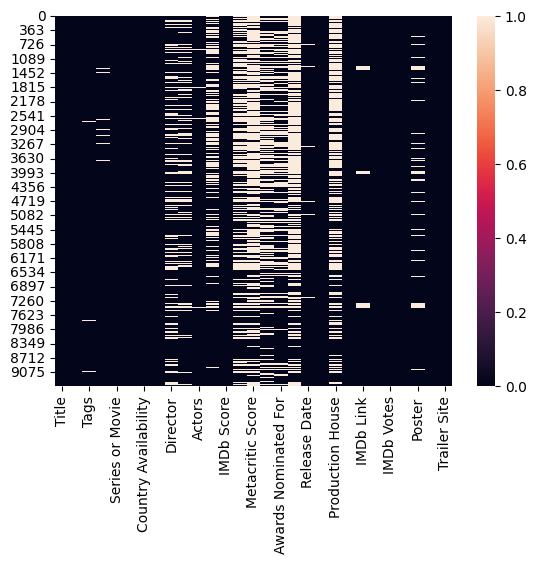

In [13]:
sns.heatmap(df.isnull())

In [18]:
df.drop(['Release Date','Production House'],axis=1,inplace=True)

In [19]:
df.columns

Index(['Genre', 'Languages', 'Series or Movie', 'Hidden Gem Score',
       'Country Availability', 'Runtime', 'Director', 'Writer', 'Actors',
       'IMDb Score', 'Rotten Tomatoes Score', 'Awards Received',
       'Awards Nominated For', 'IMDb Votes', 'Image'],
      dtype='object')

In [20]:
df.shape

(9425, 15)

In [21]:
df.isnull().sum()

,0
Genre,25
Languages,170
Series or Movie,0
Hidden Gem Score,10
Country Availability,11
Runtime,1
Director,2305
Writer,1810
Actors,111
IMDb Score,8


<Axes: >

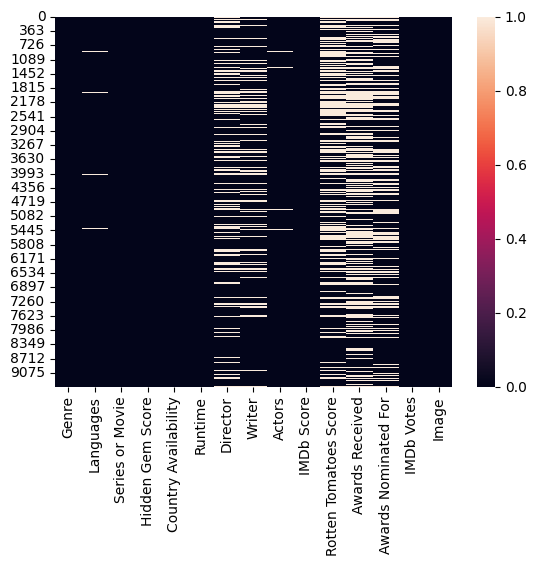

In [22]:
sns.heatmap(df.isnull())

In [23]:
df.dropna(subset=['Director'],inplace=True)
df.dropna(subset=['Writer'],inplace=True)
df.dropna(subset=['Languages'],inplace=True)
df.dropna(subset=['Actors'],inplace=True)
df.dropna(subset=['Country Availability'],inplace=True)
df.dropna(subset=['Genre'],inplace=True)

In [24]:
df.isna().sum()

,0
Genre,0
Languages,0
Series or Movie,0
Hidden Gem Score,3
Country Availability,0
Runtime,0
Director,0
Writer,0
Actors,0
IMDb Score,3


<Axes: >

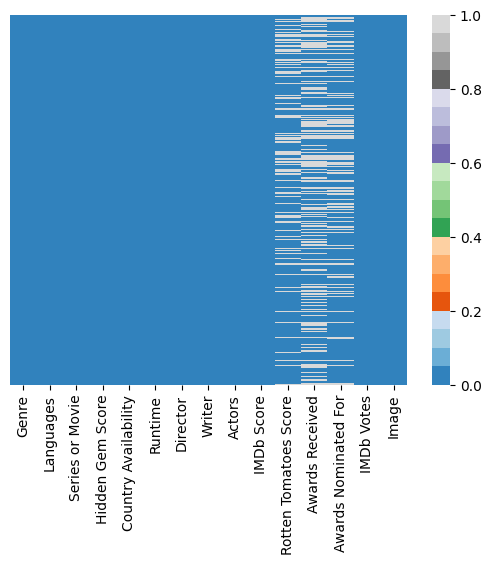

In [25]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="tab20c")

In [27]:
df['Hidden Gem Score'].ffill(axis=0,inplace=True) #forward filling
df['IMDb Score'].bfill(axis=0,inplace=True) #backward filling

/tmp/ipython-input-2614885488.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['IMDb Score'].bfill(axis=0,inplace=True) #backward filling


In [28]:
df.isnull().sum()

,0
Genre,0
Languages,0
Series or Movie,0
Hidden Gem Score,0
Country Availability,0
Runtime,0
Director,0
Writer,0
Actors,0
IMDb Score,0


In [30]:
df['IMDb Votes']=df['IMDb Votes'].fillna(df['IMDb Votes'].mode()[0])

In [31]:
df.isnull().sum()

,0
Genre,0
Languages,0
Series or Movie,0
Hidden Gem Score,0
Country Availability,0
Runtime,0
Director,0
Writer,0
Actors,0
IMDb Score,0


<Axes: >

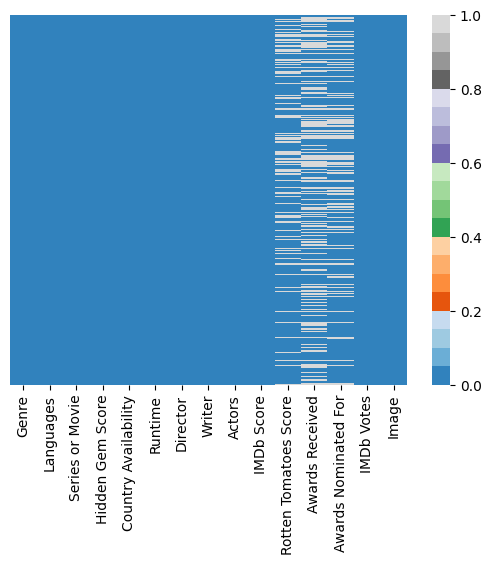

In [32]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="tab20c")

In [33]:
import warnings
warnings.filterwarnings('ignore')

In [34]:
df['Rotten Tomatoes Score'].isnull().sum()

np.int64(1419)

In [35]:
df['Rotten Tomatoes Score'].unique()

array([ 98.,  79.,  nan,  20.,  92.,  68.,  52.,  96.,  89.,  85.,  51.,
        87.,  86., 100.,  88.,  45.,  83.,  61.,  90.,  75.,  94.,  30.,
        56.,  91.,  77.,  82.,  78.,  73.,  44.,  93.,  72.,  97.,  40.,
        35.,  42.,  54.,  46.,  36.,  64.,  69.,  43.,  60.,  84.,  53.,
        62.,  74.,  59.,  70.,  66.,  63.,  80.,  95.,  12.,  71.,  99.,
        76.,  67.,  65.,  81.,  50.,  13.,  38.,   6.,  55.,  11.,  29.,
        41.,  24.,  28.,  57.,  58.,   7.,  26.,   8.,  14.,  33.,  25.,
        10.,  47.,  48.,  31.,  22.,  32.,  27.,  37.,  49.,   1.,  34.,
        23.,  19.,  15.,  39.,  18.,  21.,  16.,   0.,  17.,   4.,   9.,
         5.,   3.,   2.])

In [36]:
df['Rotten Tomatoes Score'].nunique()

101

In [38]:
df['Rotten Tomatoes Score'].fillna(df['Rotten Tomatoes Score'].mean(),inplace=True)

In [39]:
df['Rotten Tomatoes Score'].isnull().sum()

np.int64(0)

In [40]:
df['Awards Received'] = df['Awards Received'].fillna(0)

In [41]:
df['Awards Received'].isnull().sum()

np.int64(0)

In [42]:
df['Awards Nominated For']=df['Awards Nominated For'].fillna(1)

In [43]:
df.isnull().sum()

,0
Genre,0
Languages,0
Series or Movie,0
Hidden Gem Score,0
Country Availability,0
Runtime,0
Director,0
Writer,0
Actors,0
IMDb Score,0


In [44]:
df.describe()

,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Awards Received,Awards Nominated For,IMDb Votes
count,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6.687000e+03
mean,4.895708,6.713923,64.139142,6.350232,12.423060,7.811257e+04
std,2.359638,0.873889,22.433073,16.731278,27.801915,1.656528e+05
min,0.600000,2.200000,0.000000,0.000000,1.000000,5.000000e+00
25%,3.000000,6.200000,55.000000,0.000000,1.000000,1.980500e+03
50%,4.100000,6.800000,64.139142,1.000000,4.000000,1.529900e+04
75%,7.500000,7.300000,81.000000,5.000000,11.000000,7.852500e+04
max,9.500000,9.300000,100.000000,300.000000,355.000000,2.354197e+06


<Axes: >

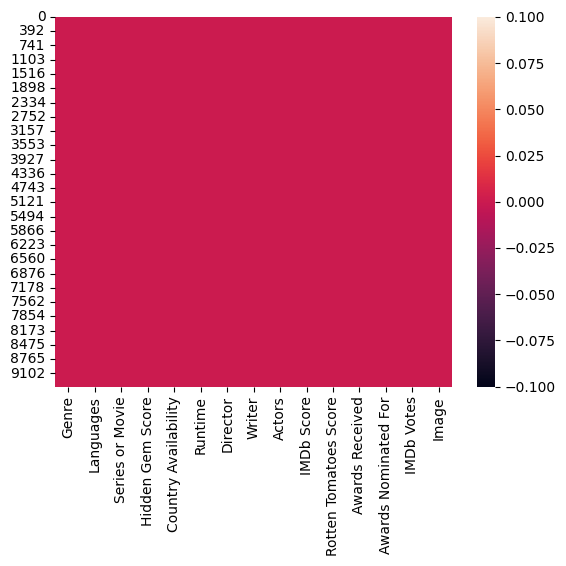

In [45]:
sns.heatmap(df.isnull())

In [46]:
df.reset_index(inplace=True)